# Изучаю Machine Learning

<strong>Цель:</strong> хочу уметь прогнозировать поведение субъектов для повышения количества продаж продуктов, для повышения вовлеченности пользователей.

Созданию понимание на базе открытых <a href="https://www.youtube.com/watch?v=7eh4d6sabA0&ab_channel=ProgrammingwithMosh">курсов</a>. 

### Обучение и прогнозирование

У нас есть конечный набор входных и выходных данных. Мы хотим предсказать результат выходных данных и их точноть по новым, полученным из вне, опираясь на готовую модель.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Считываем данные из .csv файла и выводим парочку для понимания

In [2]:
music_data = pd.read_csv('datasets/music.csv')
music_data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


Создаем значения для вводных данных (возраст и пол) и для выходных данных (жанр музыки), строим по ним предсказательную модель.

In [3]:
X = music_data.drop(columns = ['genre'])
Y = music_data['genre']

model = DecisionTreeClassifier().fit(X.values, Y)

Подаем на вход 22 летнего человека с полом 0, которого нет в начальных данных, и просим предсказать его любимый жанр музыки

In [4]:
model.predict([ [22, 0] ])

array(['Dance'], dtype=object)

Тоже самое, только подаём на вход человека с возрастом 21 и полом 1

In [5]:
model.predict([ [21, 1] ])

array(['HipHop'], dtype=object)

### Вычисление точности

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Разбиваем начальные данные на две категории: данные для обучения модели и для её тестирования

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y, test_size = 0.2)

Тренируем нашу модель и делаем предсказание 

In [8]:
model = DecisionTreeClassifier().fit(X_train, Y_train)
predictions = model.predict(X_test)

print(predictions)

['Dance' 'Classical' 'Acoustic' 'HipHop']


Опираясь на тестовые данные, оцениваем точность нашего предсказания

In [9]:
score = accuracy_score(Y_test, predictions)
score

1.0

### Сохранение и загрузка моделей

Данных может быть очень много и времени на обучение модели может уйти много, поэтому нужно понимать как сохранять и загружать модели

In [10]:
import joblib

Сохранение

In [11]:
joblib.dump(model, 'models/music-recommender.joblib')

['models/music-recommender.joblib']

Загрузка и предсказание

In [12]:
loaded_model = joblib.load('models/music-recommender.joblib')
loaded_model.predict([ [22, 0] ])

array(['Dance'], dtype=object)

### Визуализация древа выбора

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

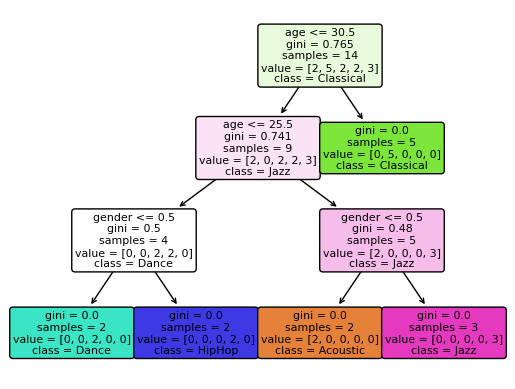

In [14]:
plot = tree.plot_tree(
    model, 
    feature_names = [ 'age', 'gender' ],
    class_names = sorted(Y.unique()),
    label = 'all',
    rounded = True,
    filled = True
)